# Pyber Challenge

### 4.3 Loading and Reading CSV files

In [24]:
# Add Matplotlib inline magic command
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd

# File to Load (Remember to change these)
city_data_to_load = "Resources/city_data.csv"
ride_data_to_load = "Resources/ride_data.csv"

# Read the City and Ride Data
city_data_df = pd.read_csv(city_data_to_load)
ride_data_df = pd.read_csv(ride_data_to_load)

### Merge the DataFrames

In [25]:
# Combine the data into a single dataset
pyber_data_df = pd.merge(ride_data_df, city_data_df, how="left", on=["city", "city"])

# Display the data table for preview
pyber_data_df.tail()

,city,date,fare,ride_id,driver_count,type
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural
2374,Newtonview,2019-04-25 10:20:13,55.84,9990581345298,1,Rural


In [26]:
# Create the Urban city DataFrame.
urban_cities_df = pyber_data_df[pyber_data_df["type"] == "Urban"]
#suburban_cities_df = pyber_data_df[pyber_data_df["type"] == "Suburban"]
#rural_cities_df = pyber_data_df[pyber_data_df["type"] == "Rural"]


## Deliverable 1: Get a Summary DataFrame 

In [35]:
#  1. Get the total rides for each city type
#urban_ride_count = urban_cities_df.groupby(["city"]).count()["ride_id"]
#suburban_ride_count = suburban_cities_df.groupby(["city"]).count()["ride_id"]
#rural_ride_count = rural_cities_df.groupby(["city"]).count()["ride_id"]


total_rides = pyber_data_df.groupby(["type"]).count()["ride_id"]
total_rides

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [36]:
# 2. Get the total drivers for each city type
#urban_driver_count = urban_cities_df.groupby(["city"]).sum()["driver_count"]
#suburban_driver_count = suburban_cities_df.groupby(["city"]).sum()["driver_count"]
#rural_driver_count = rural_cities_df.groupby(["city"]).sum()["driver_count"]


total_drivers = city_data_df.groupby(["type"]).sum()["driver_count"]
total_drivers

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [37]:
#  3. Get the total amount of fares for each city type
#urban_total_fare = urban_cities_df.groupby(["city"]).sum()["fare"]
#suburban_total_fare = suburban_cities_df.groupby(["city"]).sum()["fare"]
#rural_total_fare = rural_cities_df.groupby(["city"]).sum()["fare"]
#urban_total_fare

total_fare = pyber_data_df.groupby(["type"]).sum()["fare"]
total_fare

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [31]:
#  4. Get the average fare per ride for each city type. 
#urban_avg_fare_per_ride = urban_total_fare / urban_ride_count 
#suburban_avg_fare_per_ride = suburban_total_fare / suburban_ride_count 
#rural_avg_fare_per_ride = rural_total_fare / rural_ride_count 

avg_fare_per_ride = total_fare / total_rides

avg_fare_per_ride

type
Rural       55.486282
Suburban    39.502714
Urban       16.571468
dtype: float64

In [32]:
# 5. Get the average fare per driver for each city type. 
#urban_avg_fare_per_driver = urban_total_fare / urban_driver_count
#suburban_avg_fare_per_driver = suburban_total_fare / suburban_driver_count
#rural_avg_fare_per_driver = rural_total_fare / rural_driver_count

avg_fare_per_driver = total_fare / total_drivers

avg_fare_per_driver

type
Rural       8.059460
Suburban    2.258615
Urban       0.668675
dtype: float64

In [38]:
#  6. Create a PyBer summary DataFrame. 
pyber_summary_df = pd.DataFrame(
          {"Total Rides": total_rides,
          "Total Drivers": total_drivers,
          "Total Fares": total_fare,
          "Average Fare per Ride": avg_fare_per_ride, 
          "Average Fare per Driver": avg_fare_per_driver})
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,55.486282,8.059460
Suburban,625,490,19356.33,39.502714,2.258615
Urban,1625,2405,39854.38,16.571468,0.668675


In [13]:
#  7. Cleaning up the DataFrame. Delete the index name
pyber_summary_df.index.name = None
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
Rural,125,537,4327.93,34.623440,8.059460
Suburban,625,8570,19356.33,30.970128,2.258615
Urban,1625,59602,39854.38,24.525772,0.668675


In [40]:
#  8. Format the columns.
pyber_summary_df["Total Rides"] = pyber_summary_df["Total Rides"].map("{:,}".format)
pyber_summary_df["Total Drivers"] = pyber_summary_df["Total Drivers"].map("{:,}".format)
pyber_summary_df["Average Fare per Ride"] = pyber_summary_df["Average Fare per Ride"].map("${:,.2f}".format)
pyber_summary_df["Average Fare per Driver"] = pyber_summary_df["Average Fare per Driver"].map("{:.1f}".format)

In [39]:
pyber_summary_df

,Total Rides,Total Drivers,Total Fares,Average Fare per Ride,Average Fare per Driver
type,,,,,
Rural,125,78,4327.93,55.486282,8.059460
Suburban,625,490,19356.33,39.502714,2.258615
Urban,1625,2405,39854.38,16.571468,0.668675


## Deliverable 2.  Create a multiple line plot that shows the total weekly of the fares for each type of city.

In [16]:
# 1. Read the merged DataFrame
pyber_data_df

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06 04:28:35,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29 17:04:39,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30 00:05:47,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10 21:03:50,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07 19:22:15,44.94,4256853490277,4,Rural


In [17]:
# 2. Using groupby() to create a new DataFrame showing the sum of the fares 
#  for each date where the indices are the city type and date.
pyber_data_df['date'] = pyber_data_df['date'].astype('str')
pyber_data_df['date'] = pyber_data_df['date'].str.split(' ',expand=True)
pyber_data_df


,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2019-01-14,13.83,5739410935873,5,Urban
1,South Michelleport,2019-03-04,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2019-02-24,33.44,2005065760003,57,Urban
3,Rodneyfort,2019-02-10,23.44,5149245426178,34,Urban
4,South Jack,2019-03-06,34.58,3908451377344,46,Urban
...,...,...,...,...,...,...
2370,Michaelberg,2019-04-29,13.38,8550365057598,6,Rural
2371,Lake Latoyabury,2019-01-30,20.76,9018727594352,2,Rural
2372,North Jaime,2019-02-10,11.11,2781339863778,1,Rural
2373,West Heather,2019-05-07,44.94,4256853490277,4,Rural


In [18]:
pyber_sum_fare = pyber_data_df.groupby(["type","date"]).sum()[["fare"]]


In [19]:
# 3. Reset the index on the DataFrame you created in #1. This is needed to use the 'pivot()' function.
# df = df.reset_index()
pyber_sum_fare = pyber_sum_fare.reset_index()
pyber_sum_fare

,type,date,fare
0,Rural,2019-01-01,43.69
1,Rural,2019-01-02,52.12
2,Rural,2019-01-03,19.90
3,Rural,2019-01-04,24.88
4,Rural,2019-01-06,47.33
...,...,...,...
329,Urban,2019-05-04,323.57
330,Urban,2019-05-05,322.10
331,Urban,2019-05-06,181.20
332,Urban,2019-05-07,258.01


In [55]:
# 4. Create a pivot table with the 'date' as the index, the columns ='type', and values='fare' 
# to get the total fares for each type of city by the date. 
pyber_sum_fare_pivot_df=pyber_sum_fare.pivot (index="date",columns="type", values="fare")
pyber_sum_fare_pivot_df

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-05-04,NaN,91.71,323.57
2019-05-05,26.53,154.78,322.10
2019-05-06,111.88,34.12,181.20


In [64]:
# 5. Create a new DataFrame from the pivot table DataFrame using loc on the given dates, '2019-01-01':'2019-04-29'.


#pyber_sum_fare_pivot['date'] = pyber_sum_fare_pivot['date'].astype('str')
New_pyber_sum_fare_pivot=pyber_sum_fare_pivot_df.loc[(pyber_sum_fare_pivot_df.index>='2019-01-01')&(pyber_sum_fare_pivot_df.index<='2019-04-29')]
New_pyber_sum_fare_pivot

type,Rural,Suburban,Urban
date,,,
2019-01-01,43.69,128.52,127.78
2019-01-02,52.12,274.92,305.99
2019-01-03,19.90,133.48,260.48
2019-01-04,24.88,20.69,258.14
2019-01-05,NaN,101.36,506.89
...,...,...,...
2019-04-25,55.84,155.98,419.81
2019-04-26,NaN,132.45,330.98
2019-04-27,52.34,268.25,367.30


In [65]:
# 6. Set the "date" index to datetime datatype. This is necessary to use the resample() method in Step 8.
New_pyber_sum_fare_pivot.index=pd.to_datetime(New_pyber_data_pivot.index)


In [66]:
# 7. Check that the datatype for the index is datetime using df.info()
New_pyber_sum_fare_pivot.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 119 entries, 2019-01-01 to 2019-04-29
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Rural     74 non-null     float64
 1   Suburban  118 non-null    float64
 2   Urban     119 non-null    float64
dtypes: float64(3)
memory usage: 3.7 KB


In [94]:
# 8. Create a new DataFrame using the "resample()" function by week 'W' and get the sum of the fares for each week.
New_pyber_sum_fare_week=New_pyber_sum_fare_pivot.resample("W").sum()
New_pyber_sum_fare_week

type,Rural,Suburban,Urban
date,,,
2019-01-06,187.92,721.60,1661.68
2019-01-13,67.65,1105.13,2050.43
2019-01-20,306.00,1218.20,1939.02
2019-01-27,179.69,1203.28,2129.51
2019-02-03,333.08,1042.79,2086.94
2019-02-10,115.80,974.34,2162.64
2019-02-17,95.82,1045.50,2235.07
2019-02-24,419.06,1412.74,2466.29
2019-03-03,175.14,858.46,2218.20


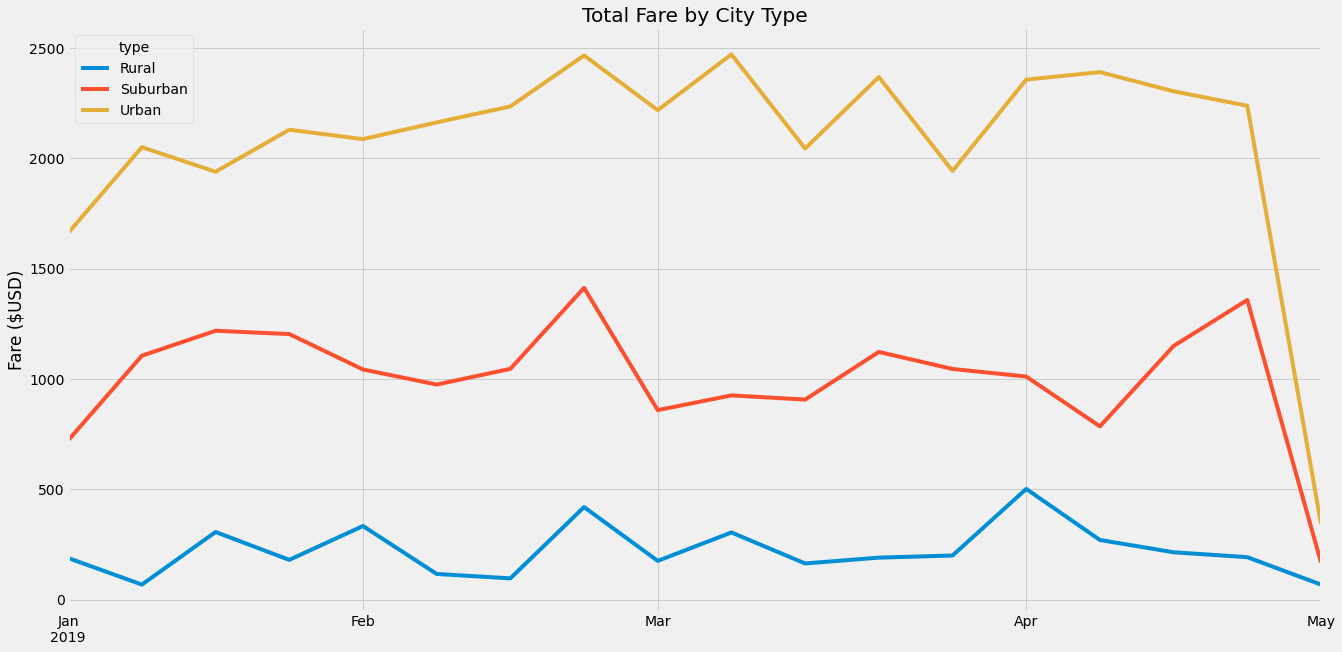

In [96]:
# 8. Using the object-oriented interface method, plot the resample DataFrame using the df.plot() function. 

# Import the style from Matplotlib.
from matplotlib import style
# Use the graph style fivethirtyeight.
style.use('fivethirtyeight')
New_pyber_sum_fare_week.plot(figsize=(20,10))
plt.title("Total Fare by City Type")
plt.ylabel("Fare ($USD)")
plt.xlabel("")

# Save the figure.
plt.savefig("analysis/PyBer_fare_summary.png")

<Figure size 432x288 with 0 Axes>